In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import glob

In [2]:
# Specify the path to your main folder containing subfolders with CSV files
main_path = r"C:\Users\vaugh\Desktop\basketball-pf-research"

# Recursively search for all CSV files in the subfolders
all_files = glob.glob(os.path.join(main_path, "*.csv"))

seasons = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

separated_dfs_by_season = {}

for season in seasons:
    separated_dfs_by_season[season] = {}
    for filename in all_files:
        if season in filename:
            print(filename)
            filename = filename.split('\\')[-1]
            df = pd.read_csv(filename)
            separated_dfs_by_season[season][filename[:-4]] = pd.read_csv(filename)

C:\Users\vaugh\Desktop\basketball-pf-research\2001advanced.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2001per_game.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2001play-by-play.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2001shooting.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2002advanced.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2002per_game.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2002play-by-play.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2002shooting.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2003advanced.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2003per_game.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2003play-by-play.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2003shooting.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2004advanced.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2004per_game.csv
C:\Users\vaugh\Desktop\basketball-pf-research\2004play-by-play.csv
C:\Users\vaugh\Desktop\basketball-pf-re

In [3]:
# Remove 'Unnamed: 0' columns from each dataframe in the dictionary
for season in separated_dfs_by_season:
    for df in separated_dfs_by_season[season]:
        separated_dfs_by_season[season][df].drop(columns=[col for col in separated_dfs_by_season[season][df].columns if 'Unnamed' in col], inplace=True)

# Create a new dictionary to hold the merged dataframes by season
dfs_by_season = {}

for season in separated_dfs_by_season:
    merged_df = pd.merge(separated_dfs_by_season[season][season + 'advanced'], separated_dfs_by_season[season][season + 'shooting'], on='Player', how='inner')
    merged_df = pd.merge(merged_df, separated_dfs_by_season[season][season + 'per_game'], on='Player', how='inner')
    merged_df = pd.merge(merged_df, separated_dfs_by_season[season][season + 'play-by-play'], on='Player', how='inner')
    dfs_by_season[season] = merged_df

In [4]:
dfs_by_season['2004']

,Player,G,MP,USG%,% of FGA by Distance - 2P,% of FGA by Distance - 0-3,% of FGA by Distance - 3-10,% of FGA by Distance - 10-16,% of FGA by Distance - 16-3P,% of FGA by Distance - 3P,...,FGA,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,Fouls Drawn - Shoot
0,Aaron McKie,75,2112,16.2,.702,.234,.087,.163,.218,.298,...,7.7,1.5,0.6,2.8,2.6,1.1,0.3,1.4,1.9,54
1,Aaron Williams,72,1337,17.5,.991,.468,.254,.123,.146,.009,...,4.8,2.2,1.4,2.7,1.1,0.5,0.6,1.2,2.6,77
2,Adonal Foyle,44,572,13.4,1.000,.408,.408,.100,.085,.000,...,3.0,0.8,1.2,2.6,0.4,0.1,1.0,0.5,1.5,14
3,Adrian Griffin,19,133,8.2,.889,.167,.056,.167,.500,.111,...,0.9,0.2,0.1,0.9,0.5,0.4,0.1,0.2,0.9,1
4,Al Harrington,79,2441,22.9,.915,.327,.138,.237,.215,.085,...,11.5,3.2,2.1,4.4,1.7,1.0,0.3,2.1,3.2,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,Zendon Hamilton,46,473,16.3,1.000,.758,.095,.084,.063,.000,...,2.1,2.1,1.1,2.1,0.3,0.2,0.2,0.6,1.6,45
439,Zoran Planinić,49,473,19.0,.752,.388,.155,.093,.116,.248,...,2.6,1.2,0.3,0.8,1.4,0.3,0.1,0.7,1.4,20
440,Zydrunas Ilgauskas,81,2539,23.1,.993,.434,.220,.199,.140,.007,...,11.9,5.0,3.4,4.6,1.3,0.5,2.5,2.0,3.4,193
441,Žarko Čabarkapa,49,570,21.7,.838,.350,.173,.142,.173,.162,...,4.0,1.1,0.5,1.5,0.8,0.2,0.3,1.1,1.5,26


In [5]:
# Create an empty list to store each season's dataframe with the season column added
df_list = []

# Loop over each season and its corresponding dataframe in dfs_by_season
for season, df in dfs_by_season.items():
    # Create a copy of the dataframe and add a 'Season' column with the current season
    df_copy = df.copy()
    df_copy['Season'] = season
    # Append the modified dataframe to the list
    df_list.append(df_copy)

# Concatenate all dataframes in the list into a single dataframe
combined_df = pd.concat(df_list, ignore_index=True)

In [6]:
combined_df

,Player,G,MP,USG%,% of FGA by Distance - 2P,% of FGA by Distance - 0-3,% of FGA by Distance - 3-10,% of FGA by Distance - 10-16,% of FGA by Distance - 16-3P,% of FGA by Distance - 3P,...,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,Fouls Drawn - Shoot,Season
0,A.C. Green,82,1411,14.4,.981,.278,.102,.164,.438,.019,...,1.4,1.3,2.5,0.5,0.4,0.1,0.5,1.5,44,2001
1,A.J. Guyton,33,630,16.5,.641,.078,.042,.094,.427,.359,...,0.5,0.3,0.8,1.9,0.3,0.2,0.7,1.1,5,2001
2,Aaron McKie,76,2394,18.9,.762,.232,.137,.183,.209,.238,...,2.6,0.4,3.7,5.0,1.4,0.1,2.7,2.3,73,2001
3,Aaron Williams,82,2336,17.8,.997,.502,.262,.131,.103,.003,...,3.8,2.6,4.6,1.1,0.7,1.4,1.6,3.9,131,2001
4,Adam Keefe,67,836,11.5,.981,.377,.176,.170,.258,.019,...,0.9,1.3,1.8,0.5,0.4,0.3,0.6,1.5,25,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,Zaza Pachulia,68,878,15.0,.979,.523,.212,.098,.145,.021,...,1.8,1.5,2.4,1.3,0.5,0.3,0.8,2.2,48,2019
8885,Zhaire Smith,6,111,16.4,.529,.324,.059,.059,.088,.471,...,1.3,0.5,1.7,1.7,0.3,0.3,1.0,1.3,2,2019
8886,Zhou Qi,1,1,43.4,1.000,1.000,.000,.000,.000,.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2019
8887,Álex Abrines,31,588,12.2,.191,.102,.025,.019,.045,.809,...,0.4,0.2,1.4,0.6,0.5,0.2,0.5,1.7,4,2019


In [7]:
combined_df.columns

Index(['Player', 'G', 'MP', 'USG%', '% of FGA by Distance - 2P',
       '% of FGA by Distance - 0-3', '% of FGA by Distance - 3-10',
       '% of FGA by Distance - 10-16', '% of FGA by Distance - 16-3P',
       '% of FGA by Distance - 3P', '% of FG Ast'd - 2P', '% of FG Ast'd - 3P',
       'Dunks - %FGA', 'Corner 3s - %3PA', 'GS', 'FG', 'FGA', 'FTA', 'ORB',
       'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'Fouls Drawn - Shoot',
       'Season'],
      dtype='object')

In [8]:
# Convert 'FTA' and 'FG' columns to numeric, setting errors='coerce' to handle non-numeric values
combined_df['FTA'] = pd.to_numeric(combined_df['FTA'], errors='coerce')
combined_df['FG'] = pd.to_numeric(combined_df['FG'], errors='coerce')

# Clean up the dataframe
combined_df['FTA / made FG'] = combined_df['FTA'] / combined_df['FG']
combined_df.rename(columns = {'PF': 'Personal Fouls Committed'}, inplace=True)
combined_df.rename(columns = {'Fouls Drawn - Shoot': 'Shooting Fouls Drawn'}, inplace=True)
combined_df.drop(columns = ['G', 'MP', '% of FGA by Distance - 2P', 'GS', 'FG', 'FTA'], inplace=True)

In [9]:
combined_df

,Player,USG%,% of FGA by Distance - 0-3,% of FGA by Distance - 3-10,% of FGA by Distance - 10-16,% of FGA by Distance - 16-3P,% of FGA by Distance - 3P,% of FG Ast'd - 2P,% of FG Ast'd - 3P,Dunks - %FGA,...,ORB,DRB,AST,STL,BLK,TOV,Personal Fouls Committed,Shooting Fouls Drawn,Season,FTA / made FG
0,A.C. Green,14.4,.278,.102,.164,.438,.019,.764,NaN,.012,...,1.3,2.5,0.5,0.4,0.1,0.5,1.5,44,2001,0.777778
1,A.J. Guyton,16.5,.078,.042,.094,.427,.359,.608,.852,.000,...,0.3,0.8,1.9,0.3,0.2,0.7,1.1,5,2001,0.208333
2,Aaron McKie,18.9,.232,.137,.183,.209,.238,.481,.943,.000,...,0.4,3.7,5.0,1.4,0.1,2.7,2.3,73,2001,0.590909
3,Aaron Williams,17.8,.502,.262,.131,.103,.003,.623,NaN,.129,...,2.6,4.6,1.1,0.7,1.4,1.6,3.9,131,2001,1.055556
4,Adam Keefe,11.5,.377,.176,.170,.258,.019,.683,1.000,.038,...,1.3,1.8,0.5,0.4,0.3,0.6,1.5,25,2001,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,Zaza Pachulia,15.0,.523,.212,.098,.145,.021,.624,NaN,.021,...,1.5,2.4,1.3,0.5,0.3,0.8,2.2,48,2019,1.384615
8885,Zhaire Smith,16.4,.324,.059,.059,.088,.471,.500,.667,.118,...,0.5,1.7,1.7,0.3,0.3,1.0,1.3,2,2019,0.565217
8886,Zhou Qi,43.4,1.000,.000,.000,.000,.000,1.000,NaN,1.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2019,0.000000
8887,Álex Abrines,12.2,.102,.025,.019,.045,.809,.800,.951,.006,...,0.2,1.4,0.6,0.5,0.2,0.5,1.7,4,2019,0.222222


In [62]:
# Set Season and Player as index so that they are not affected by PCA
final_df = combined_df.set_index(['Season', 'Player'])

# Changing all the values in the df to be floats so that I can apply PCA
final_df = final_df.apply(pd.to_numeric, errors='coerce')
final_df.fillna(0, inplace=True)  # Filling NaNs with 0
final_df = final_df.astype(float)

# Replacing any infinite values with 0
final_df.replace([np.inf, -np.inf], 0, inplace=True)

In [63]:
final_df

USG%  % of FGA by Distance - 0-3  \
Season Player                                             
2001   A.C. Green      14.4                       0.278   
       A.J. Guyton     16.5                       0.078   
       Aaron McKie     18.9                       0.232   
       Aaron Williams  17.8                       0.502   
       Adam Keefe      11.5                       0.377   
...                     ...                         ...   
2019   Zaza Pachulia   15.0                       0.523   
       Zhaire Smith    16.4                       0.324   
       Zhou Qi         43.4                       1.000   
       Álex Abrines    12.2                       0.102   
       Ángel Delgado   16.5                       0.800   

                       % of FGA by Distance - 3-10  \
Season Player                                        
2001   A.C. Green                            0.102   
       A.J. Guyton                           0.042   
       Aaron McKie                           0.137   
       Aaron Williams                        0.262   
       Adam Keefe                            0.176   
...                                            ...   
2019   Zaza Pachulia                         0.212   
       Zhaire Smith                          0.059   
       Zhou Qi                               0.000   
       Álex Abrines                          0.025   
       Ángel Delgado                         0.200   

                       % of FGA by Distance - 10-16  \
Season Player                                         
2001   A.C. Green                             0.164   
       A.J. Guyton                            0.094   
       Aaron McKie                            0.183   
       Aaron Williams                         0.131   
       Adam Keefe                             0.170   
...                                             ...   
2019   Zaza Pachulia                          0.098   
       Zhaire Smith                           0.059   
       Zhou Qi                                0.000   
       Álex Abrines                           0.019   
       Ángel Delgado                          0.000   

                       % of FGA by Distance - 16-3P  \
Season Player                                         
2001   A.C. Green                             0.438   
       A.J. Guyton                            0.427   
       Aaron McKie                            0.209   
       Aaron Williams                         0.103   
       Adam Keefe                             0.258   
...                                             ...   
2019   Zaza Pachulia                          0.145   
       Zhaire Smith                           0.088   
       Zhou Qi                                0.000   
       Álex Abrines                           0.045   
       Ángel Delgado                          0.000   

                       % of FGA by Distance - 3P  % of FG Ast'd - 2P  \
Season Player                                                          
2001   A.C. Green                          0.019               0.764   
       A.J. Guyton                         0.359               0.608   
       Aaron McKie                         0.238               0.481   
       Aaron Williams                      0.003               0.623   
       Adam Keefe                          0.019               0.683   
...                                          ...                 ...   
2019   Zaza Pachulia                       0.021               0.624   
       Zhaire Smith                        0.471               0.500   
       Zhou Qi                             0.000               1.000   
       Álex Abrines                        0.809               0.800   
       Ángel Delgado                       0.000               1.000   

                       % of FG Ast'd - 3P  Dunks - %FGA  Corner 3s - %3PA  \
Season Player                                                               
2001   A.C. Green            

In [82]:
# Creating an empty DataFrame to hold the standardized values
standardized_data = pd.DataFrame()

# Looping through each column to standardize
for column in final_df.columns:
    mean = final_df[column].mean()
    std = final_df[column].std()
    standardized_data[column] = (final_df[column] - mean) / std

# Setting up PCA to keep only the first 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(standardized_data)

In [83]:
# Summing the explained variances for each component to verify the results from the paper
explained_variance = pca.explained_variance_ratio_
sum(explained_variance)

0.7153499810839082

In [84]:
explained_variance

array([0.28474232, 0.21493207, 0.08621642, 0.07543376, 0.05402541])

In [85]:
# Getting the statistics for each individual principal component
component_loadings = pca.components_
loadings_df = pd.DataFrame(component_loadings, columns=final_df.columns, index=[f'PC{i+1}' for i in range(5)])
loadings_df

,USG%,% of FGA by Distance - 0-3,% of FGA by Distance - 3-10,% of FGA by Distance - 10-16,% of FGA by Distance - 16-3P,% of FGA by Distance - 3P,% of FG Ast'd - 2P,% of FG Ast'd - 3P,Dunks - %FGA,Corner 3s - %3PA,FGA,ORB,DRB,AST,STL,BLK,TOV,Personal Fouls Committed,Shooting Fouls Drawn,FTA / made FG
PC1,0.218498,0.077828,0.091420,0.073397,-0.015085,-0.111472,-0.025126,0.009415,0.069929,-0.049931,0.355741,0.282696,0.357216,0.244907,0.291343,0.249635,0.362086,0.323504,0.363679,0.049259
PC2,-0.167046,0.366937,0.251180,0.009675,-0.189250,-0.333422,0.211224,-0.321215,0.344116,-0.162934,-0.200926,0.259403,0.076234,-0.270453,-0.199263,0.232416,-0.157775,0.060665,-0.034729,0.156216
PC3,0.232966,-0.030844,0.223114,0.316585,0.086479,-0.281098,-0.364508,-0.386733,-0.171667,-0.429523,0.005115,-0.167695,-0.189049,0.185379,-0.058744,-0.191496,0.117204,-0.174727,0.003233,0.170986
PC4,-0.024111,0.250086,0.080180,-0.527165,-0.558105,0.260322,-0.389244,0.010737,0.124688,-0.117982,-0.025332,-0.085472,-0.071463,0.162961,0.102890,-0.090902,0.090001,-0.074682,0.026111,0.139220
PC5,-0.011713,0.306342,-0.438240,-0.153137,0.364694,-0.174872,0.093456,-0.006798,0.163231,0.147551,-0.036577,-0.085902,-0.128006,0.110633,0.140478,-0.192516,0.054820,-0.018352,0.093042,0.602989


In [86]:
for i, row in loadings_df.iterrows():
    print(i)
    print(row)
    print()

PC1
USG%                            0.218498
% of FGA by Distance - 0-3      0.077828
% of FGA by Distance - 3-10     0.091420
% of FGA by Distance - 10-16    0.073397
% of FGA by Distance - 16-3P   -0.015085
% of FGA by Distance - 3P      -0.111472
% of FG Ast'd - 2P             -0.025126
% of FG Ast'd - 3P              0.009415
Dunks - %FGA                    0.069929
Corner 3s - %3PA               -0.049931
FGA                             0.355741
ORB                             0.282696
DRB                             0.357216
AST                             0.244907
STL                             0.291343
BLK                             0.249635
TOV                             0.362086
Personal Fouls Committed        0.323504
Shooting Fouls Drawn            0.363679
FTA / made FG                   0.049259
Name: PC1, dtype: float64

PC2
USG%                           -0.167046
% of FGA by Distance - 0-3      0.366937
% of FGA by Distance - 3-10     0.251180
% of FGA by Distance -

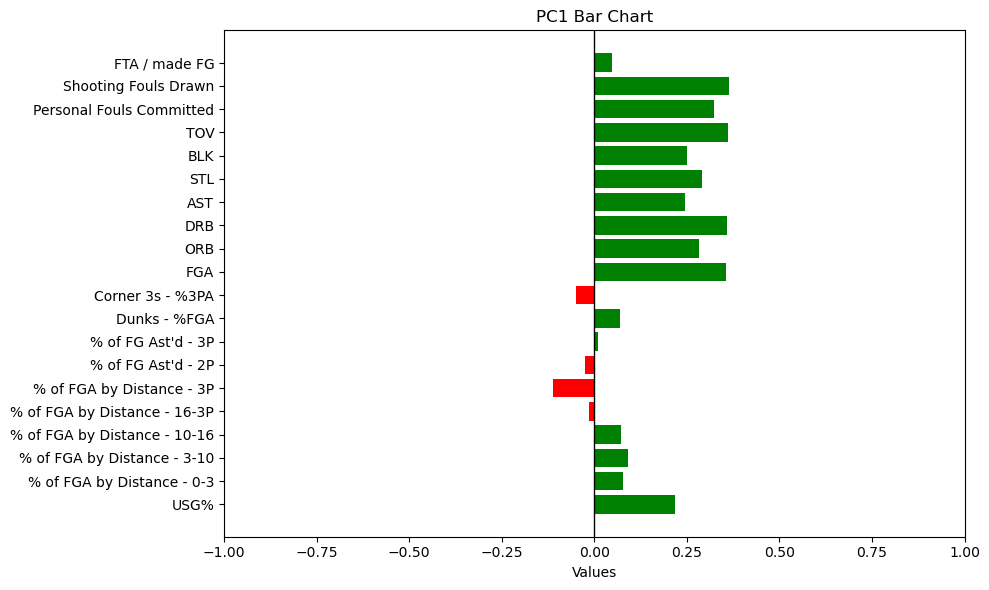

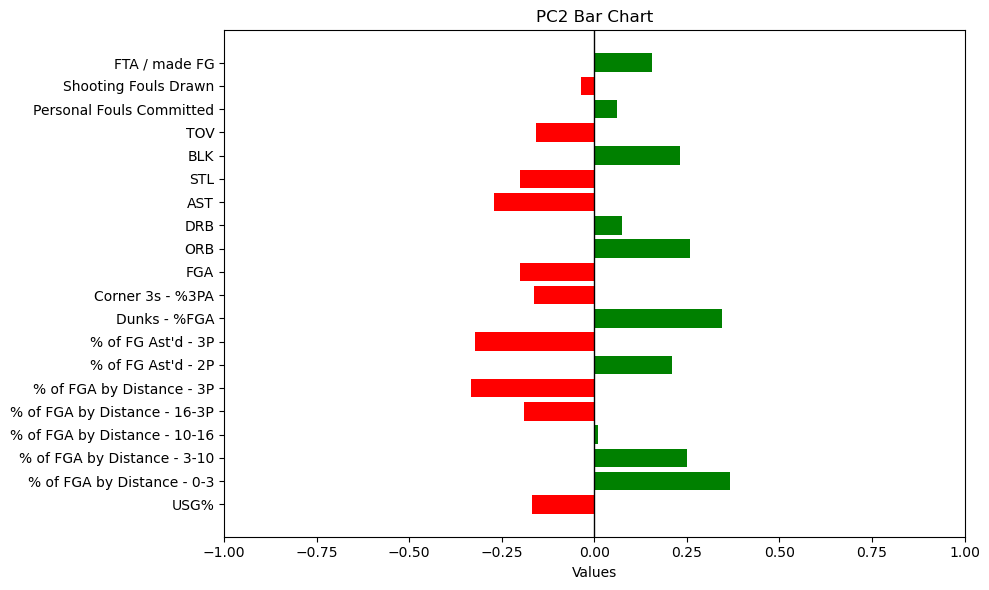

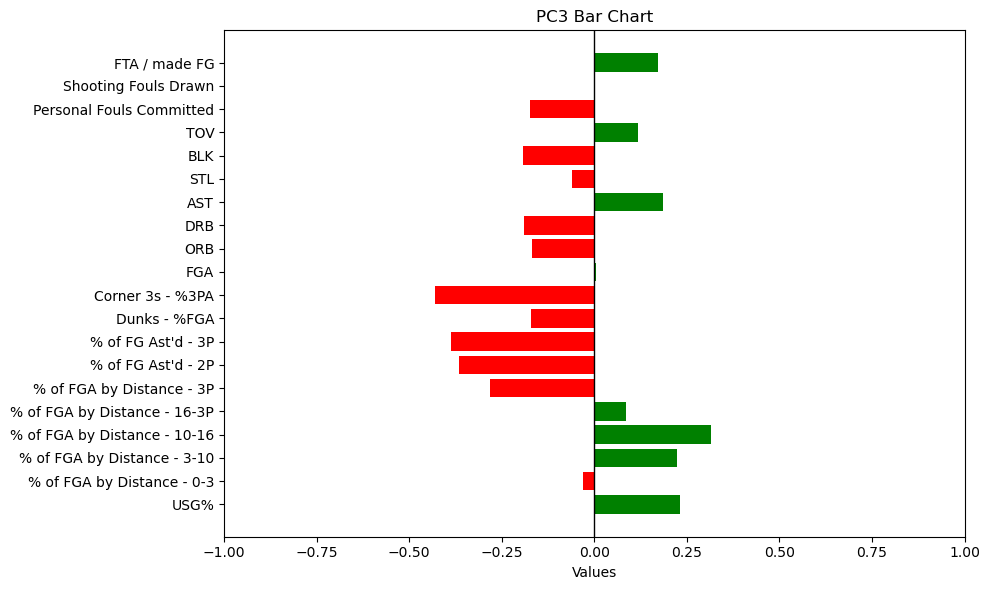

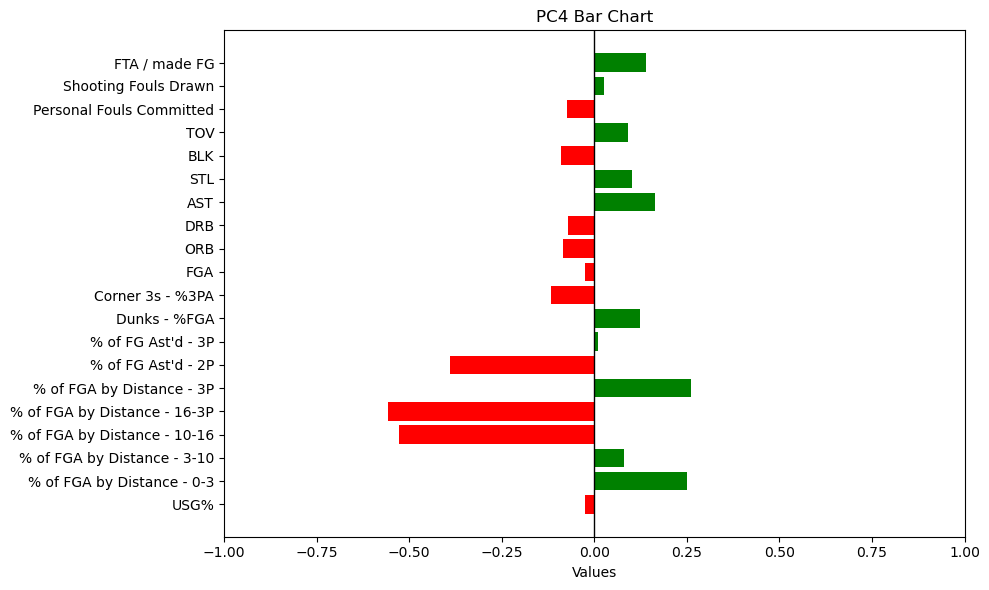

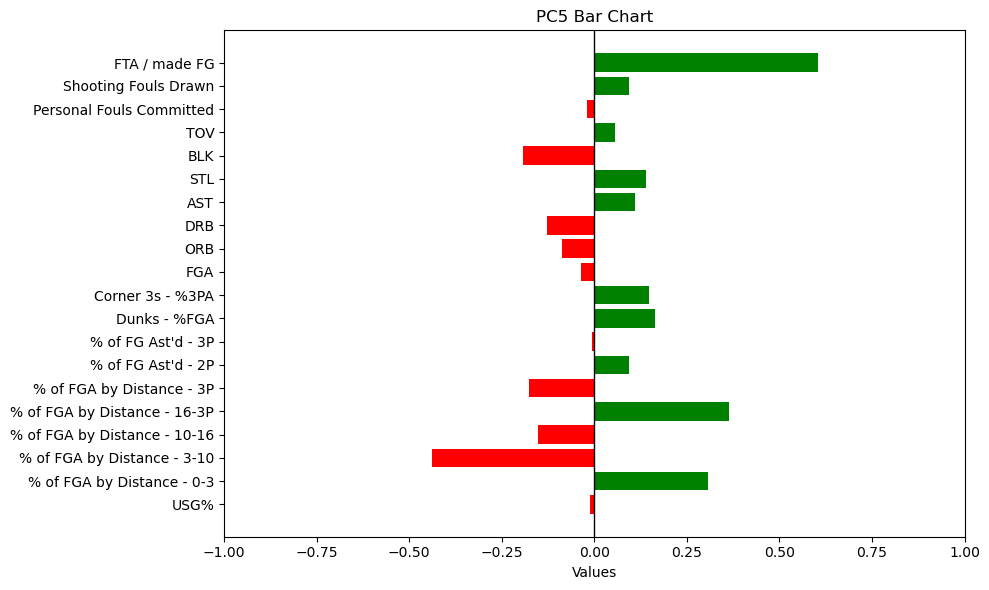

In [87]:
# Looping through each row to create individual plots
for i, row in loadings_df.iterrows():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Make the bar green if the value is positive, red if it is negative
    colors = ['green' if val >= 0 else 'red' for val in row]
    
    ax.barh(loadings_df.columns, row, color=colors)
    
    # Add vertical line at x=0
    ax.axvline(0, color='black', linewidth=1)
    
    # Center each graph at 0 and range from -1 to 1 for consistency
    ax.set_xlim(-1, 1)
    
    # Set titles and labels
    ax.set_title(f'{i} Bar Chart')
    ax.set_xlabel('Values')
    
    plt.tight_layout()
    plt.show()